<a href="https://colab.research.google.com/github/ogulcanhayirli/MarketingDataScienceExercise/blob/main/Marketing_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

Following is the Data Dictionary for Credit Card dataset :-

CUST_ID : Identification of Credit Card holder (Categorical)

*   CUST_ID : Identification of Credit Card holder (Categorical)
*   BALANCE : Balance amount left in their account to make purchases
*   BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
*   PURCHASES : Amount of purchases made from account
*   ONEOFF_PURCHASES : Maximum purchase amount done in one-go
*   INSTALLMENTS_PURCHASES : Amount of purchase done in installment
*   CASH_ADVANCE : Cash in advance given by the user
*   PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
*   ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
*   PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
*   CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
*   CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
*   PURCHASES_TRX : Numbe of purchase transactions made
*   CREDIT_LIMIT : Limit of Credit Card for user
*   PAYMENTS : Amount of Payment done by user
*  MINIMUM_PAYMENTS : Minimum amount of payments made by user
*   PRCFULLPAYMENT : Percent of full payment paid by user
*   TENURE : Tenure of credit card service for user






















2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

creditcard_df = pd.read_csv('/content/drive/My Drive/DataScience/Marketing_data.csv')

creditcard_df



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:

creditcard_df.describe()
# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12



#3: VISUALIZE AND EXPLORE DATASET

<Axes: >

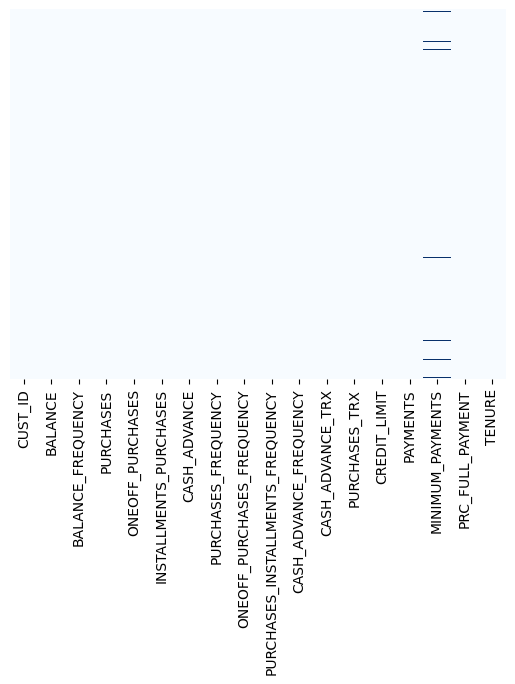

In [7]:
# I Look missing values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap='Blues')

In [8]:
creditcard_df.isnull().sum()
# I see 313 missing values in minimum payments and 1 in credit limit

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [9]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True ),'MINIMUM_PAYMENTS'] =  creditcard_df['MINIMUM_PAYMENTS'].mean()

In [10]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'

creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True ),'CREDIT_LIMIT'] =  creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

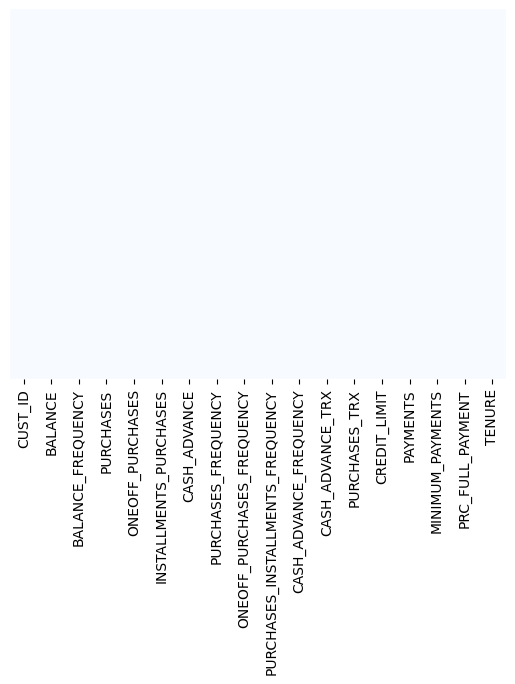

In [11]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap='Blues')

# After these operations missing values are gone

In [12]:
creditcard_df.duplicated().sum()

0

In [13]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [14]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
n = len(creditcard_df.columns)
n

17

In [16]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

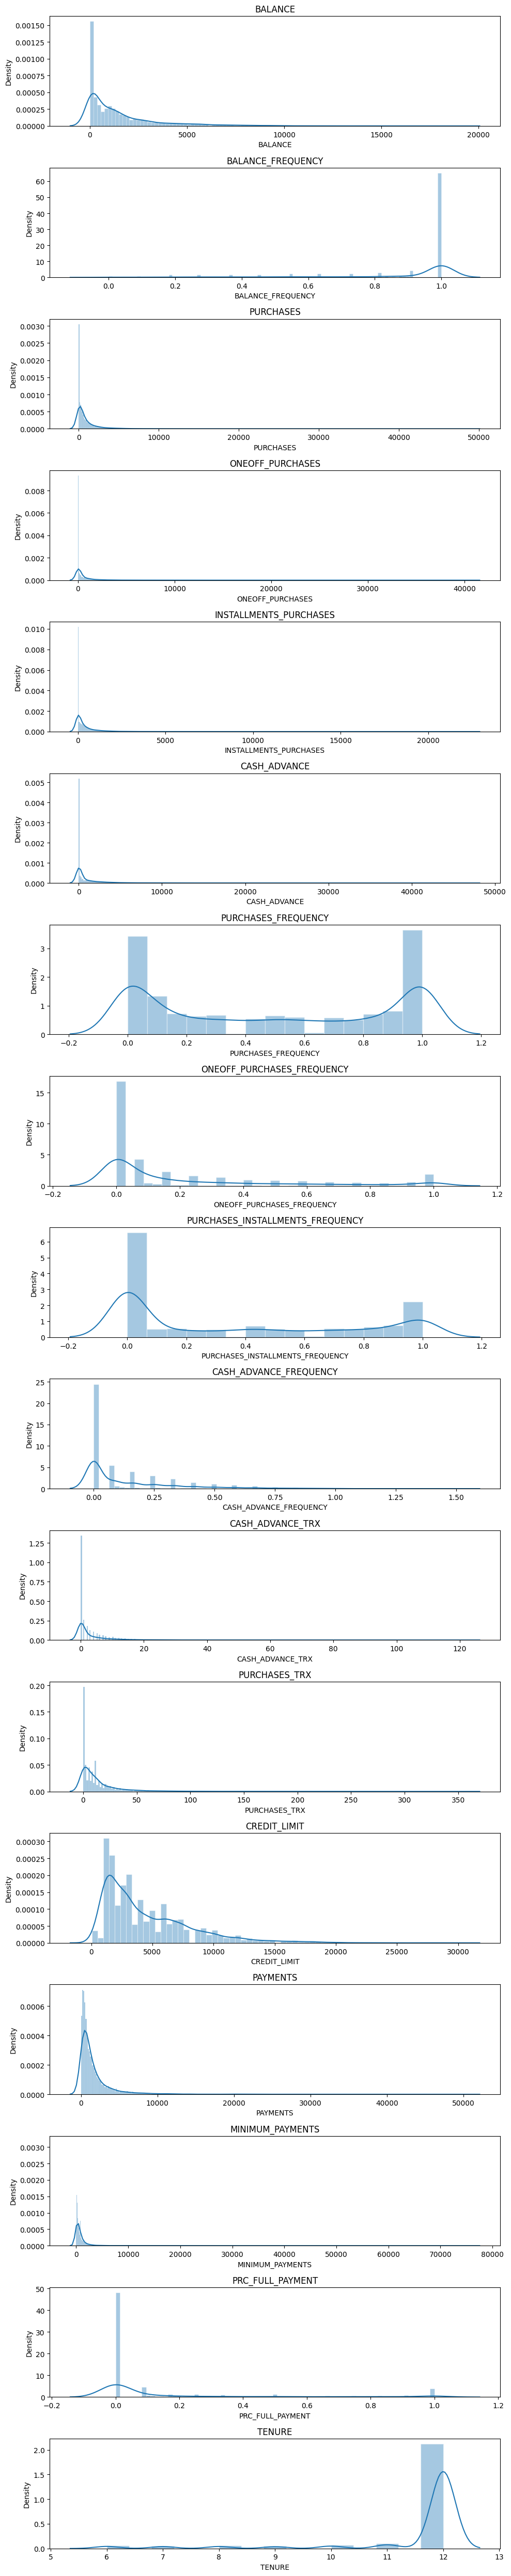

In [24]:


plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.histplot(creditcard_df[creditcard_df.columns[i]],
               kde=True,
    stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
  plt.tight_layout()
  plt.title(creditcard_df.columns[i])
plt.show()


<Axes: >

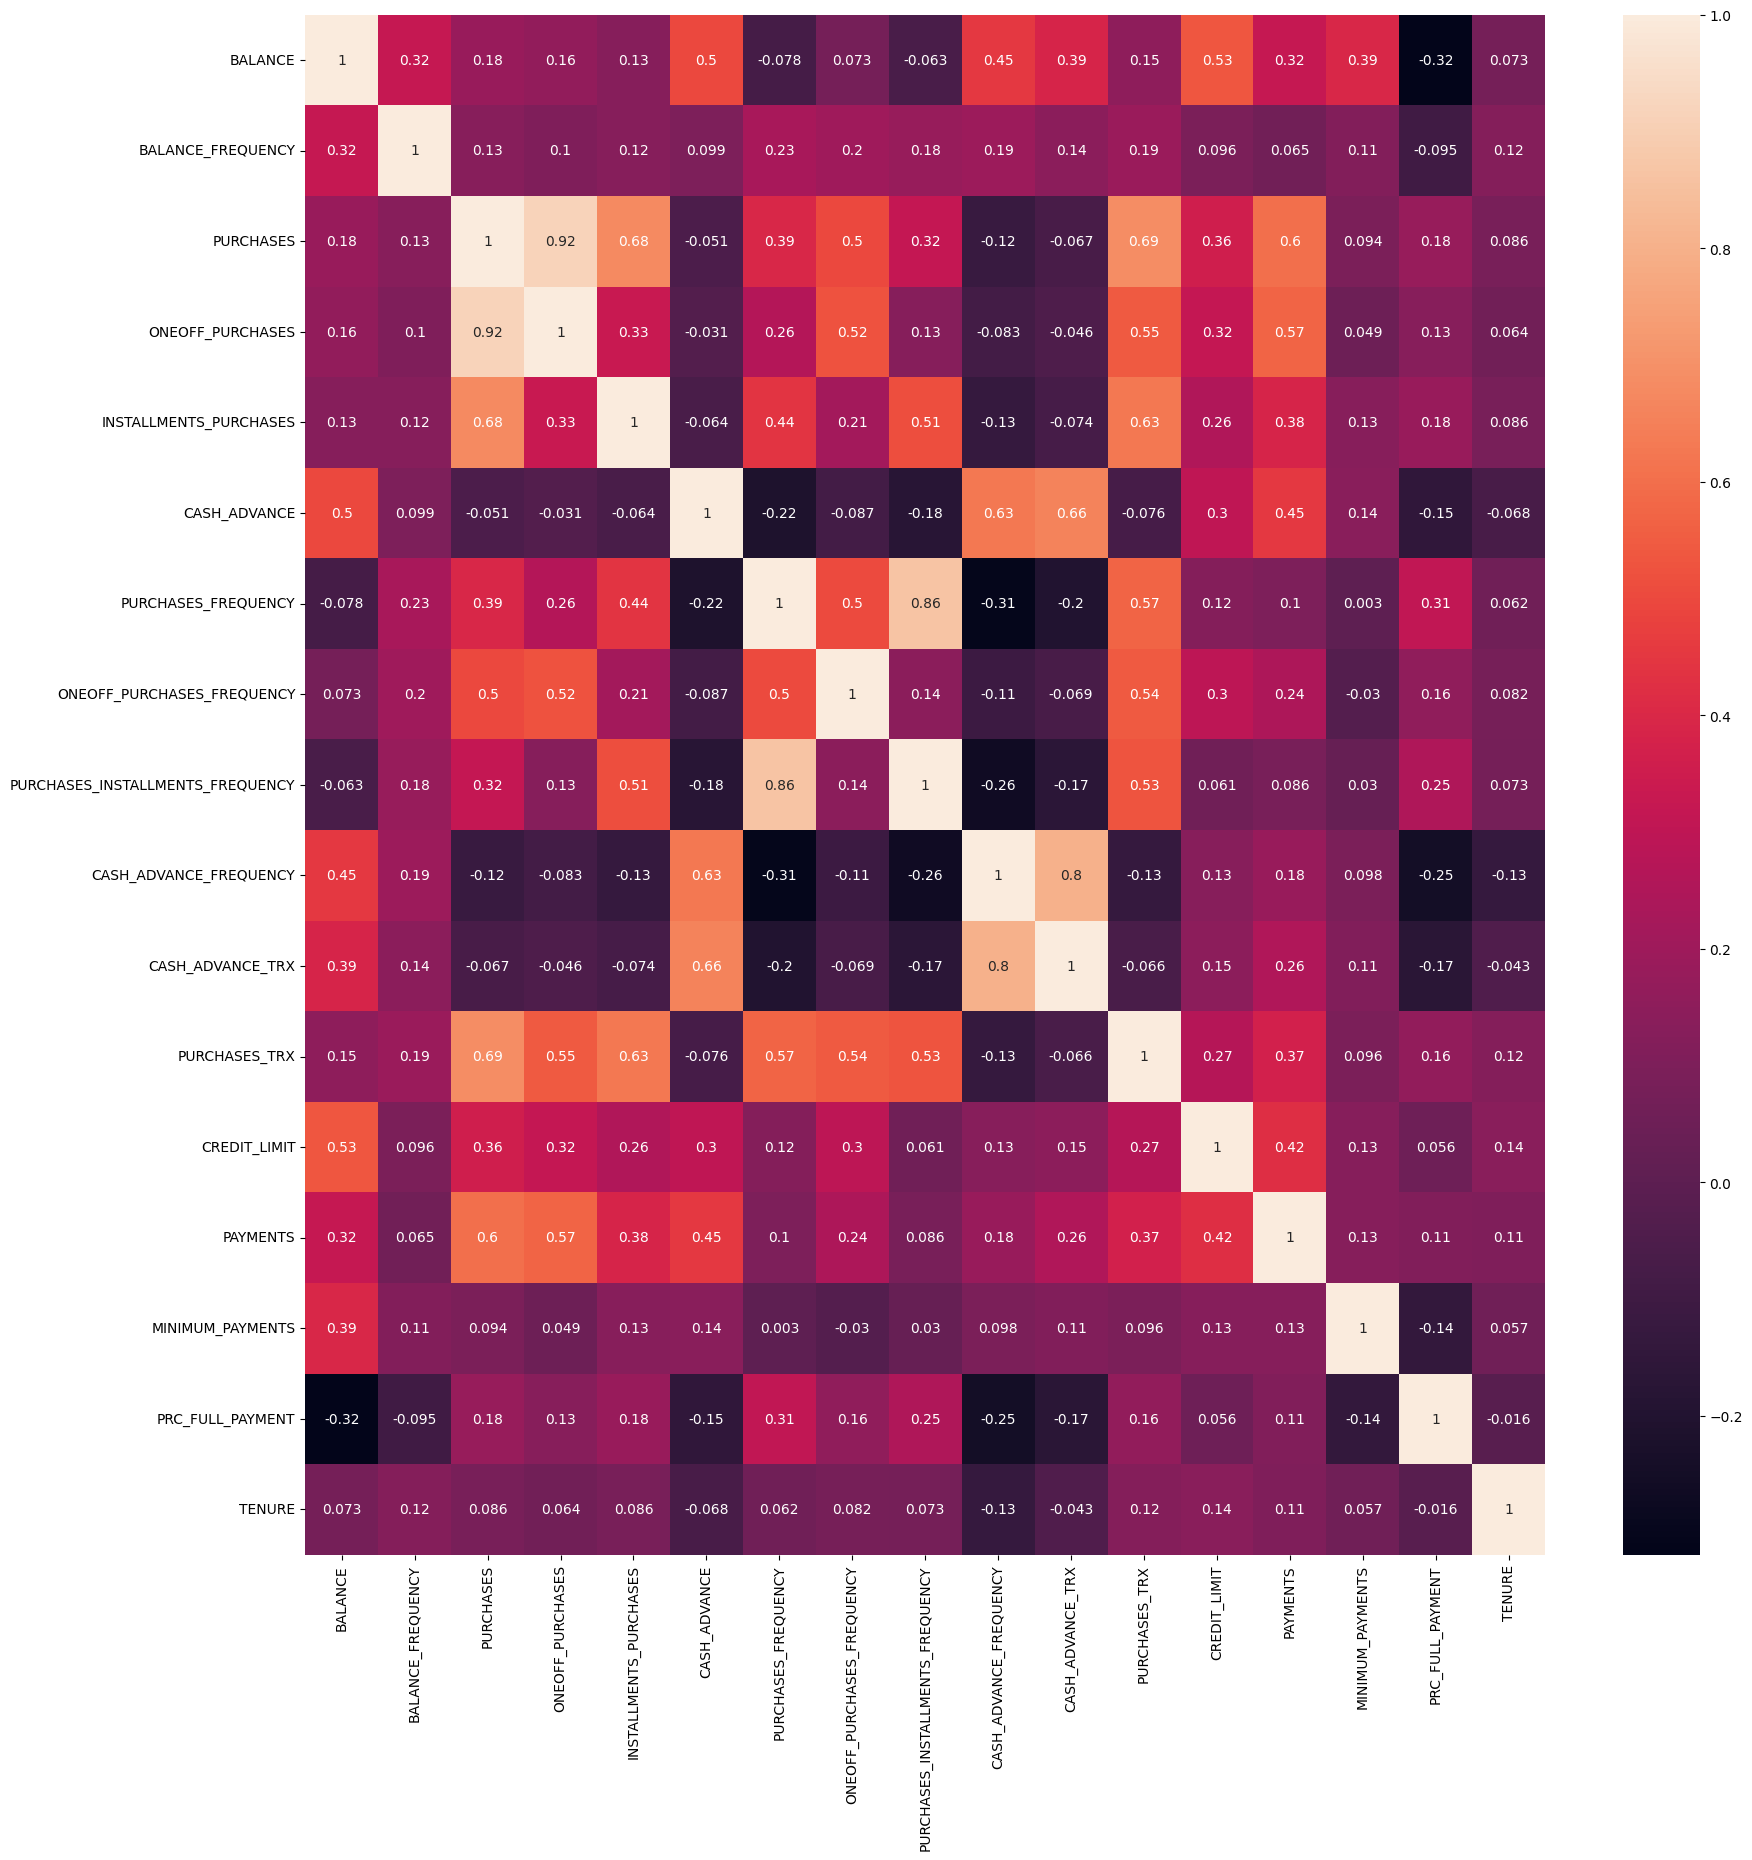

In [26]:

# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

correlations = creditcard_df.corr()

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot = True)

#4: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [28]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [30]:
creditcard_df_scaled.shape

(8950, 17)

In [63]:
score_1 = []
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(creditcard_df_scaled)
  score_1.append(kmeans.inertia_)

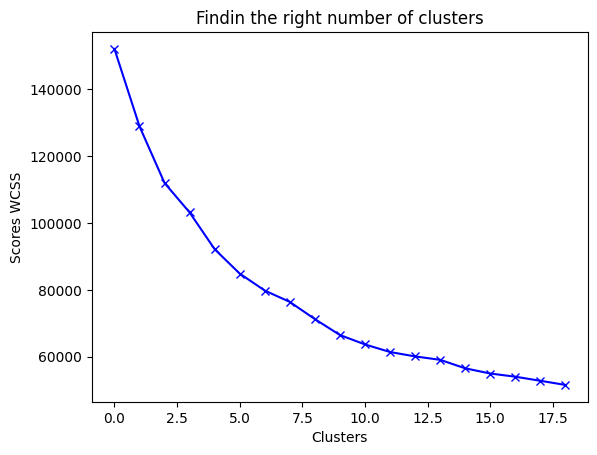

In [64]:
plt.plot(score_1, 'bx-')
plt.title('Findin the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

#6: APPLY K-MEANS METHOD

In [35]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [36]:
labels.shape

(8950,)

In [37]:
labels.max()

7

In [38]:
labels.min()

0

In [40]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'clusters':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


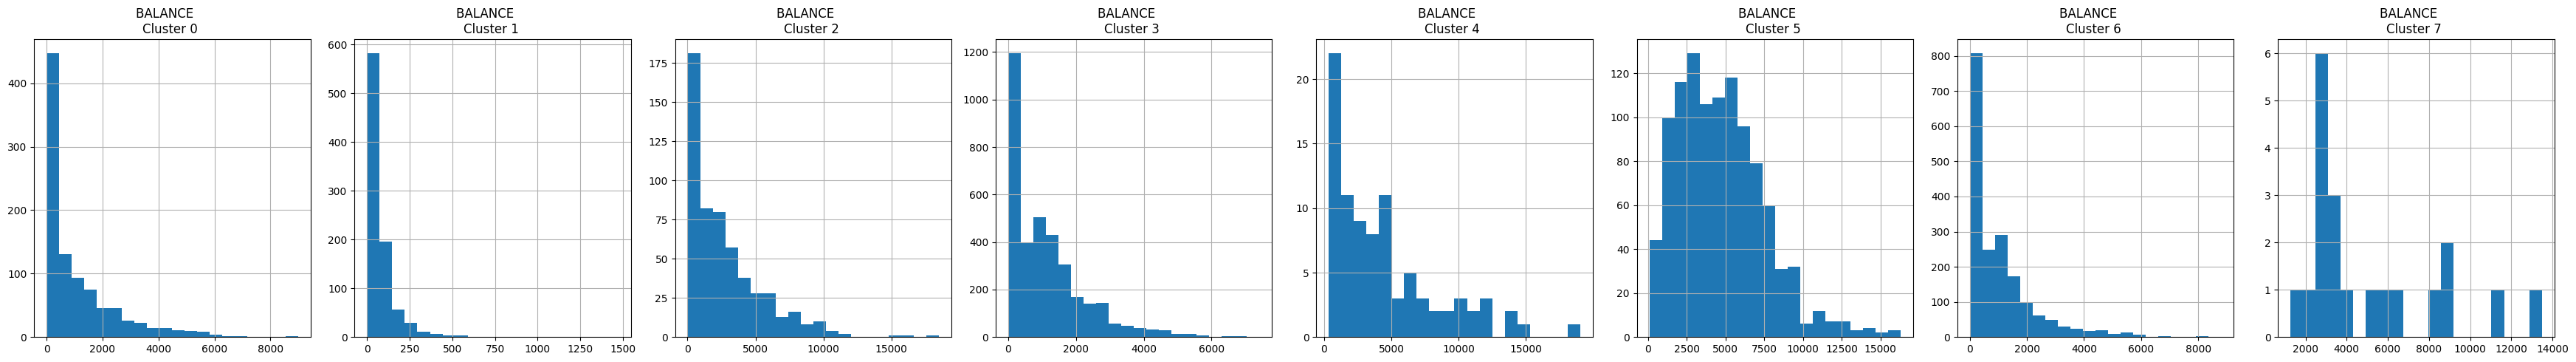

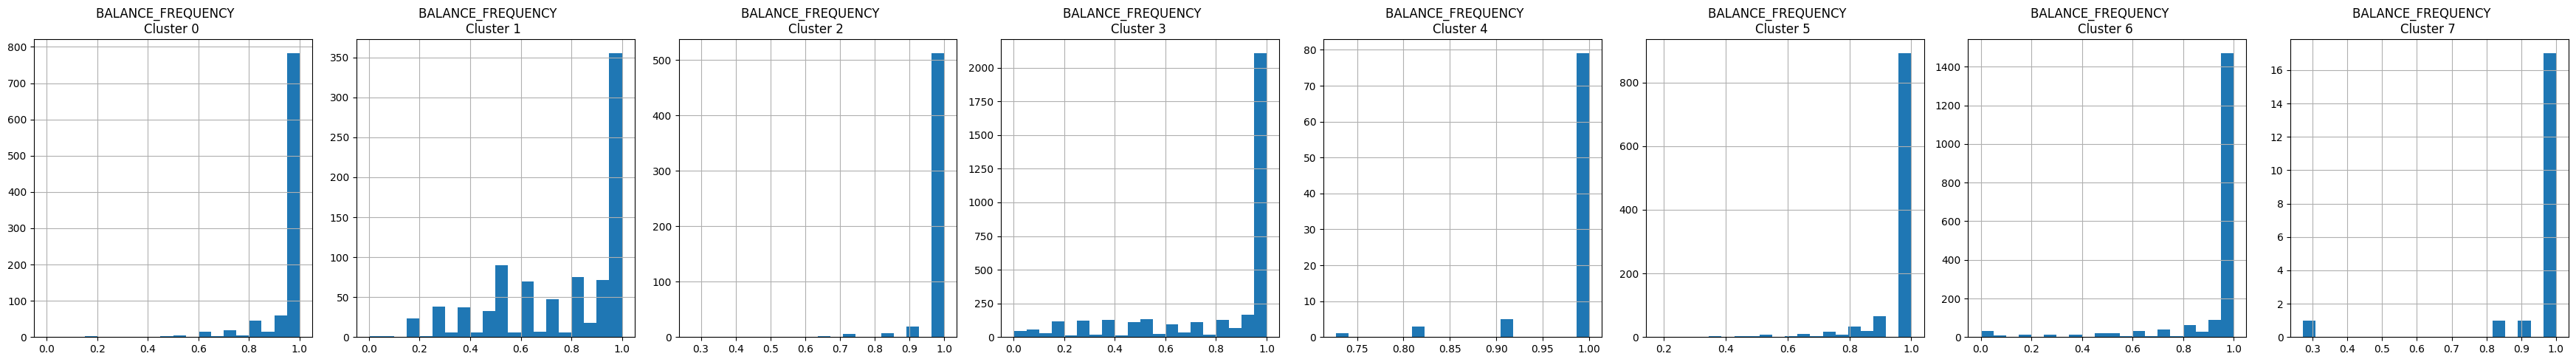

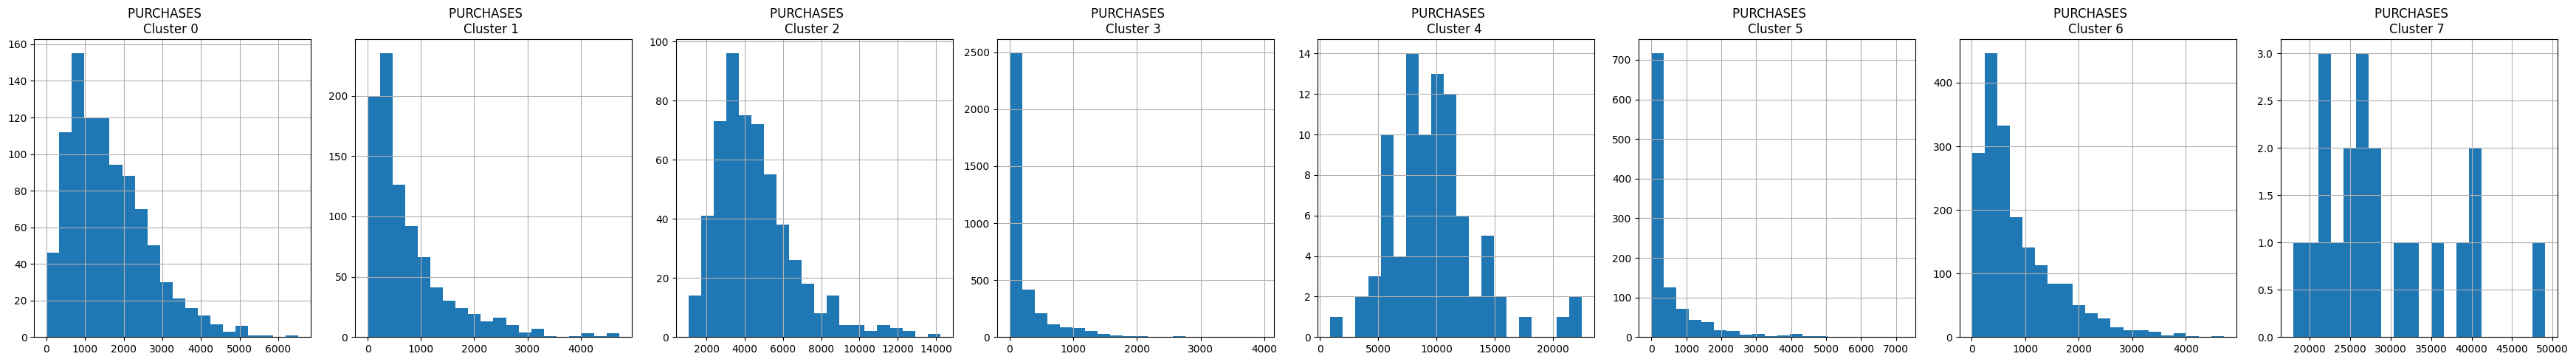

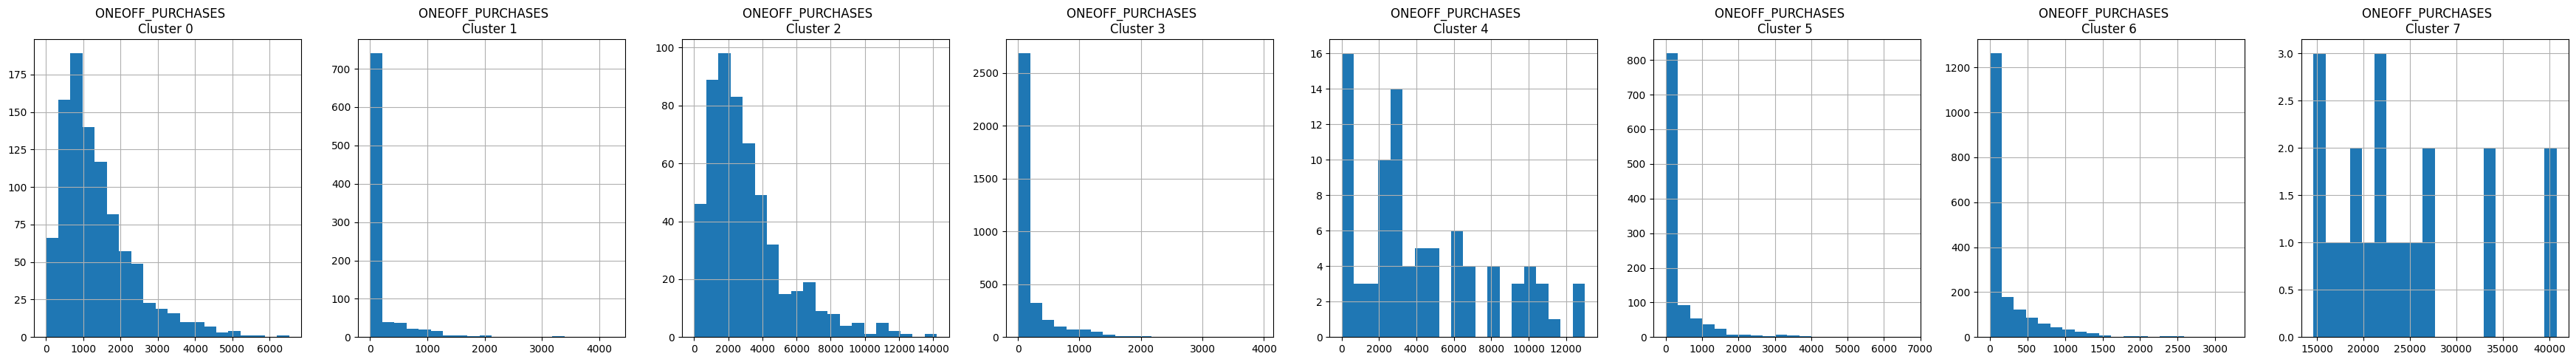

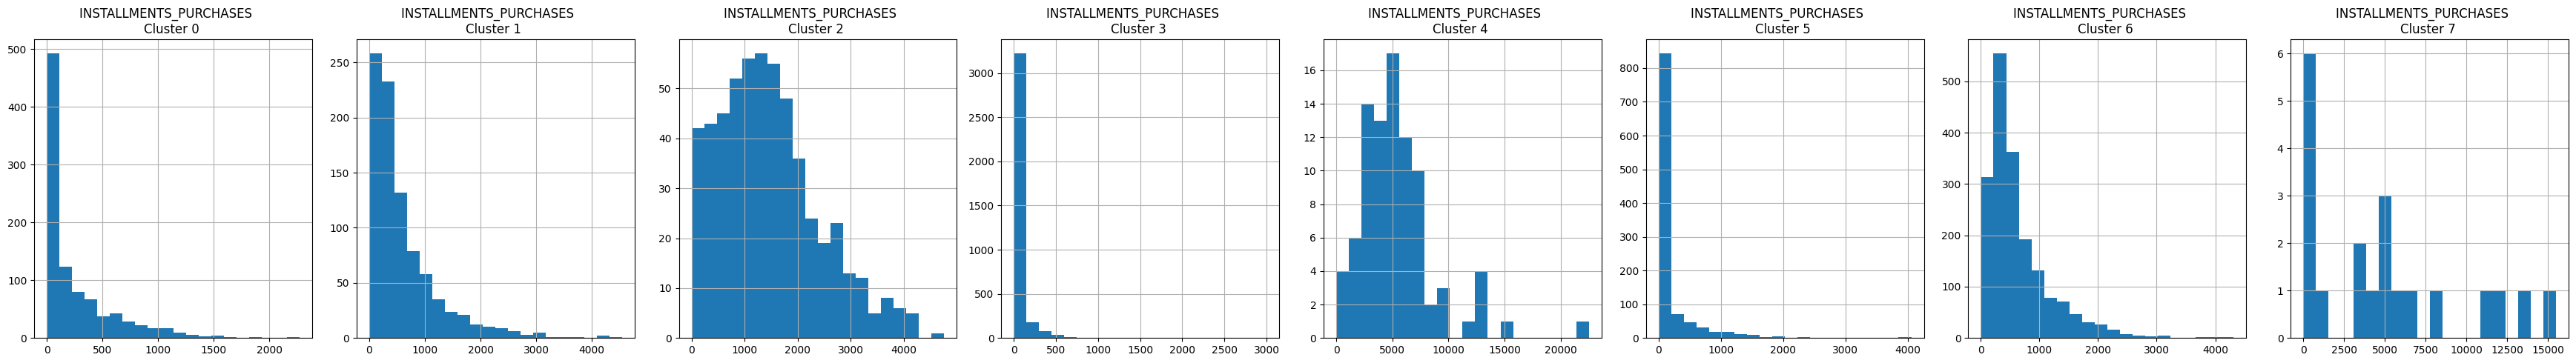

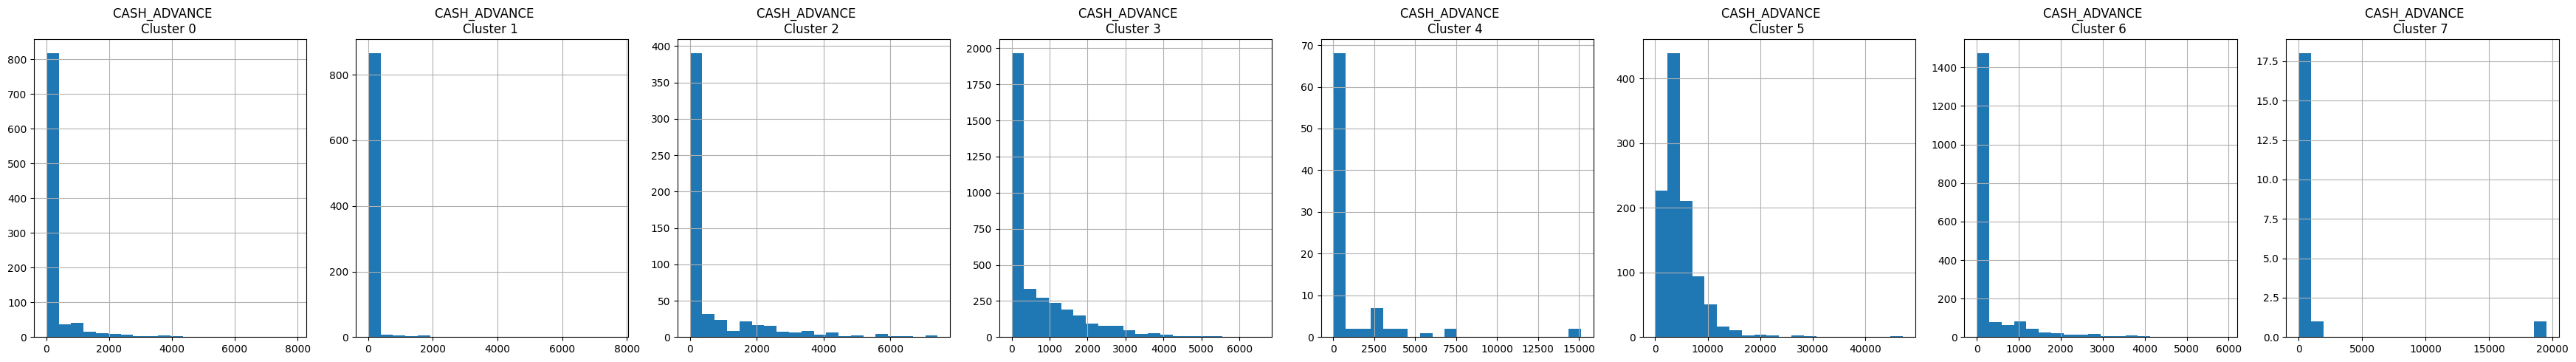

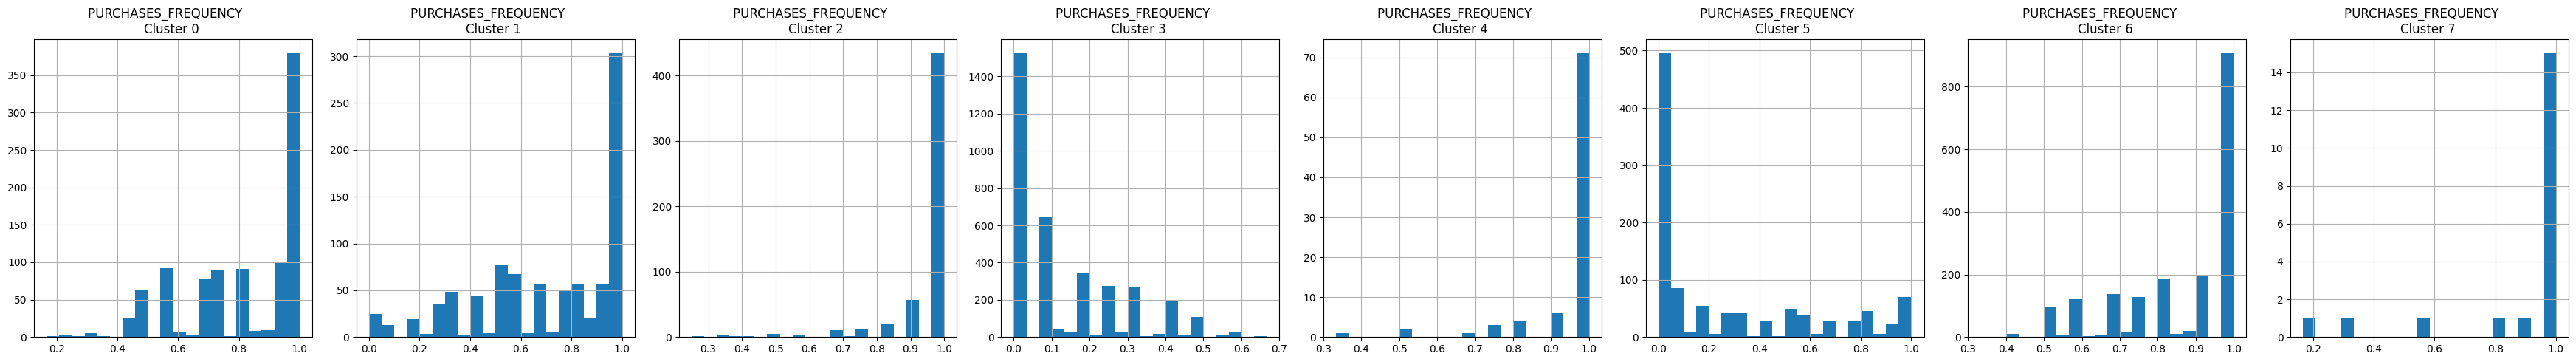

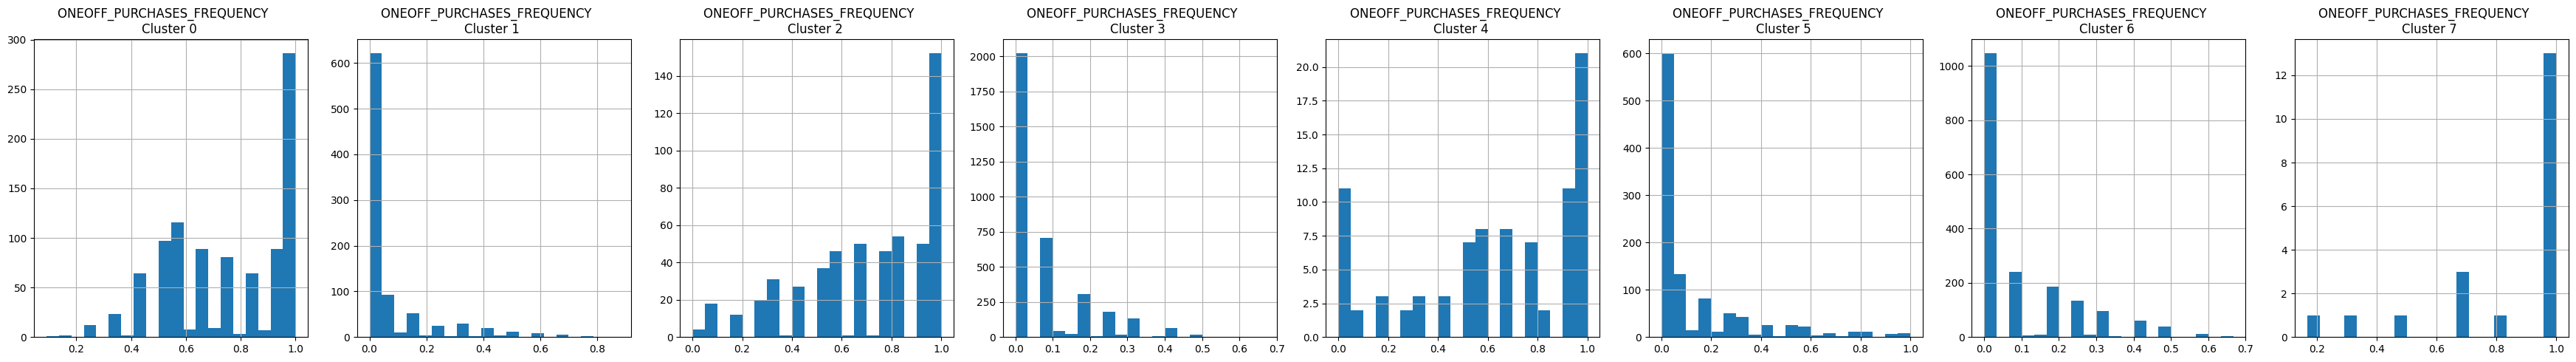

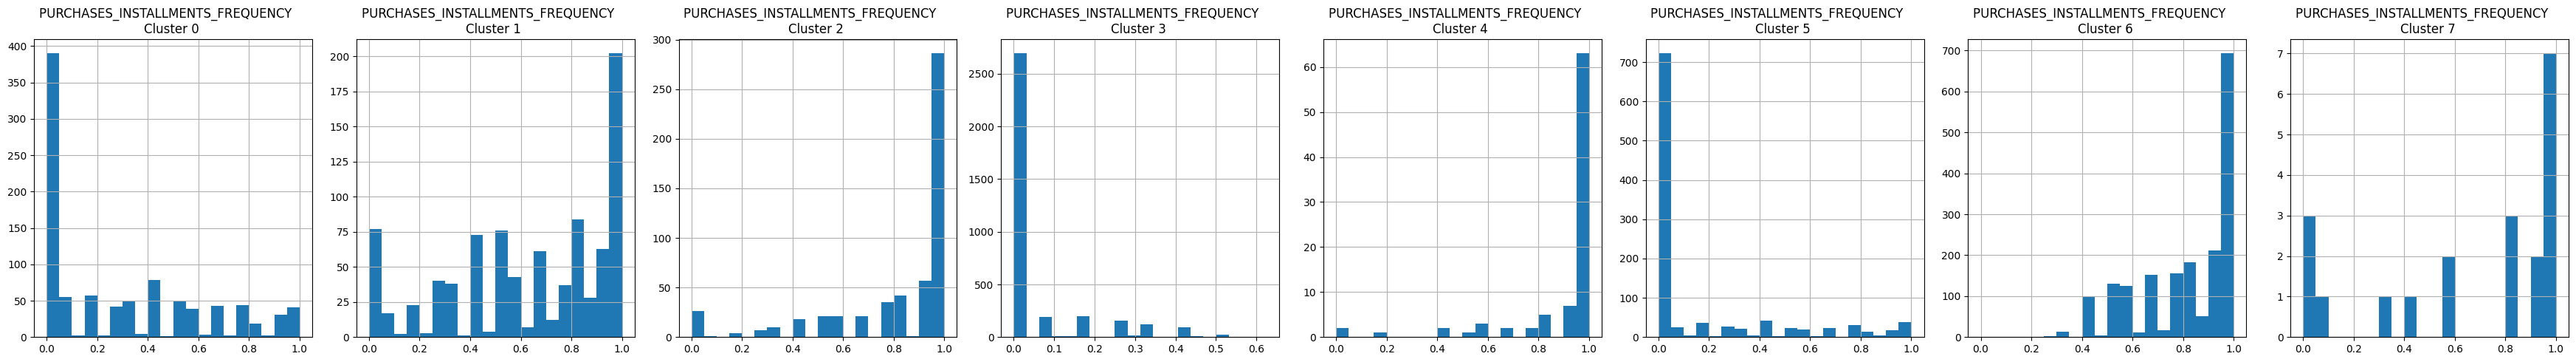

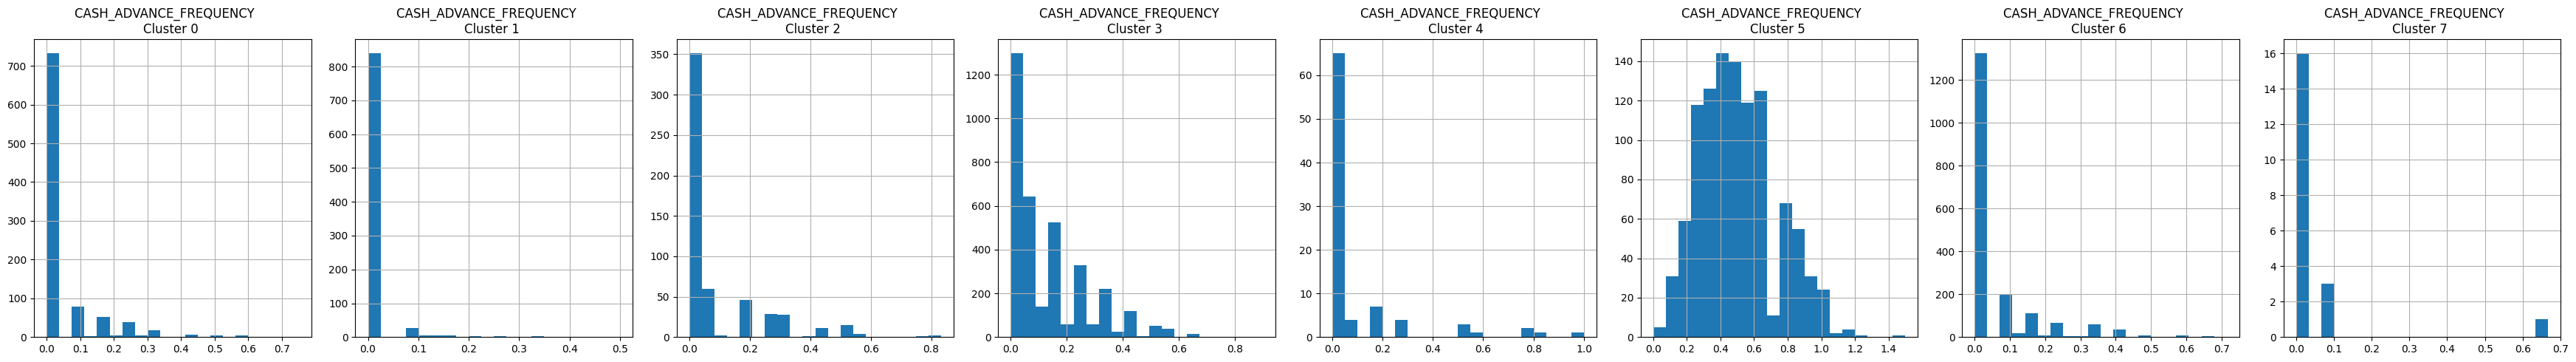

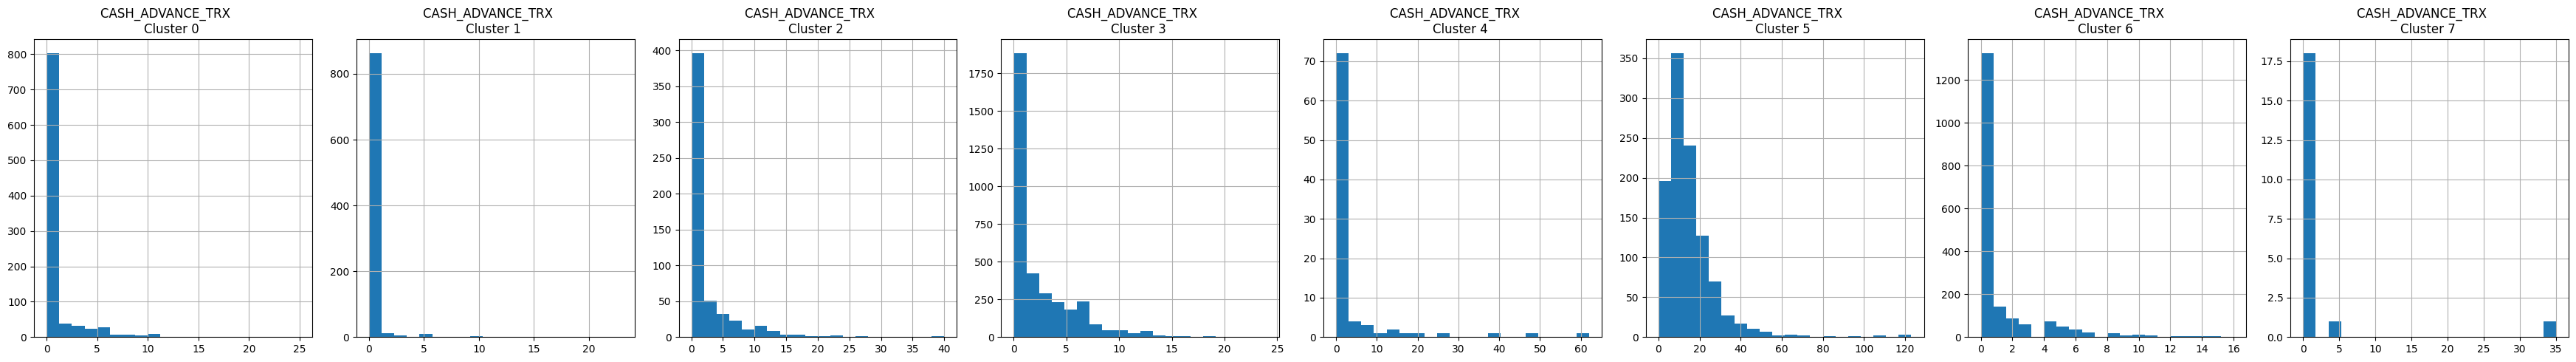

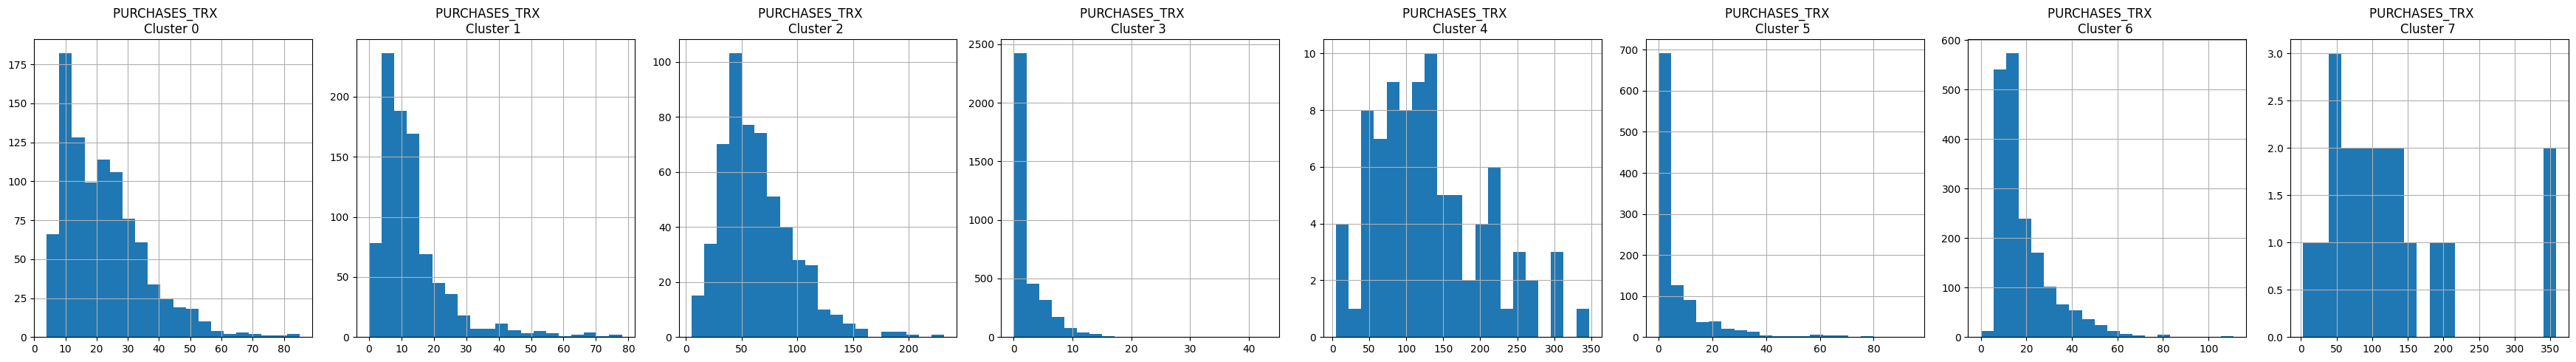

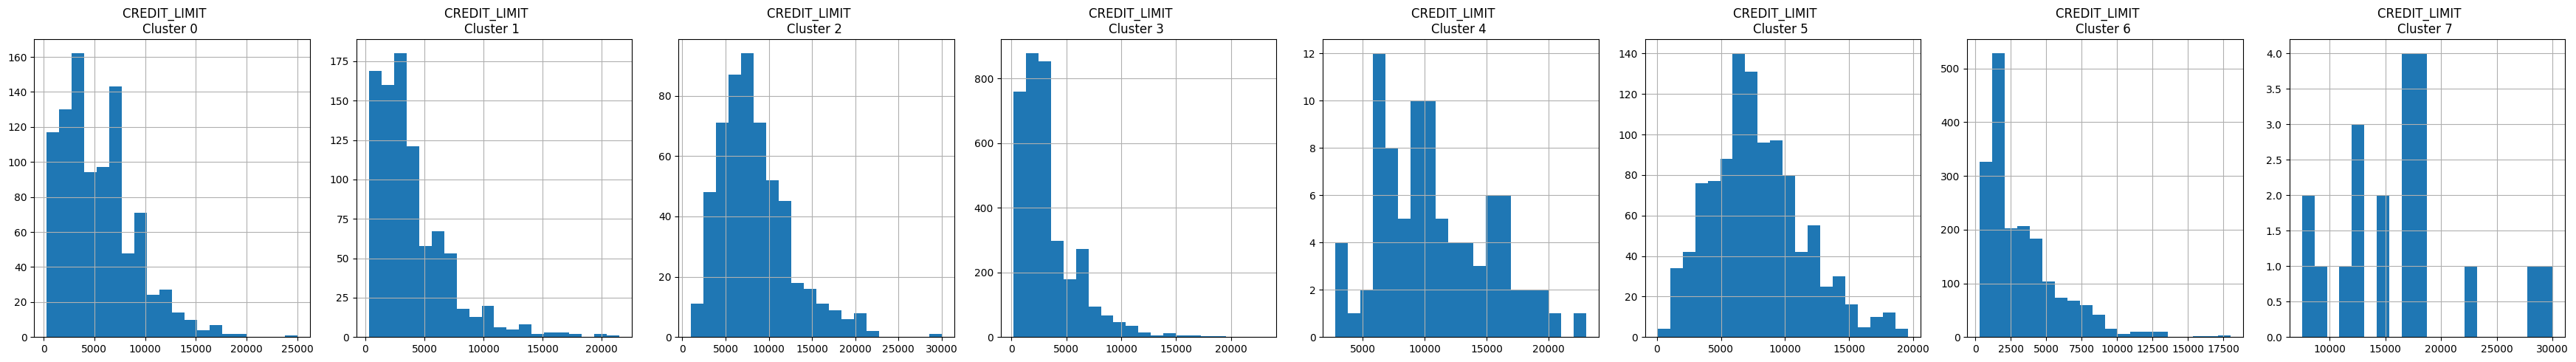

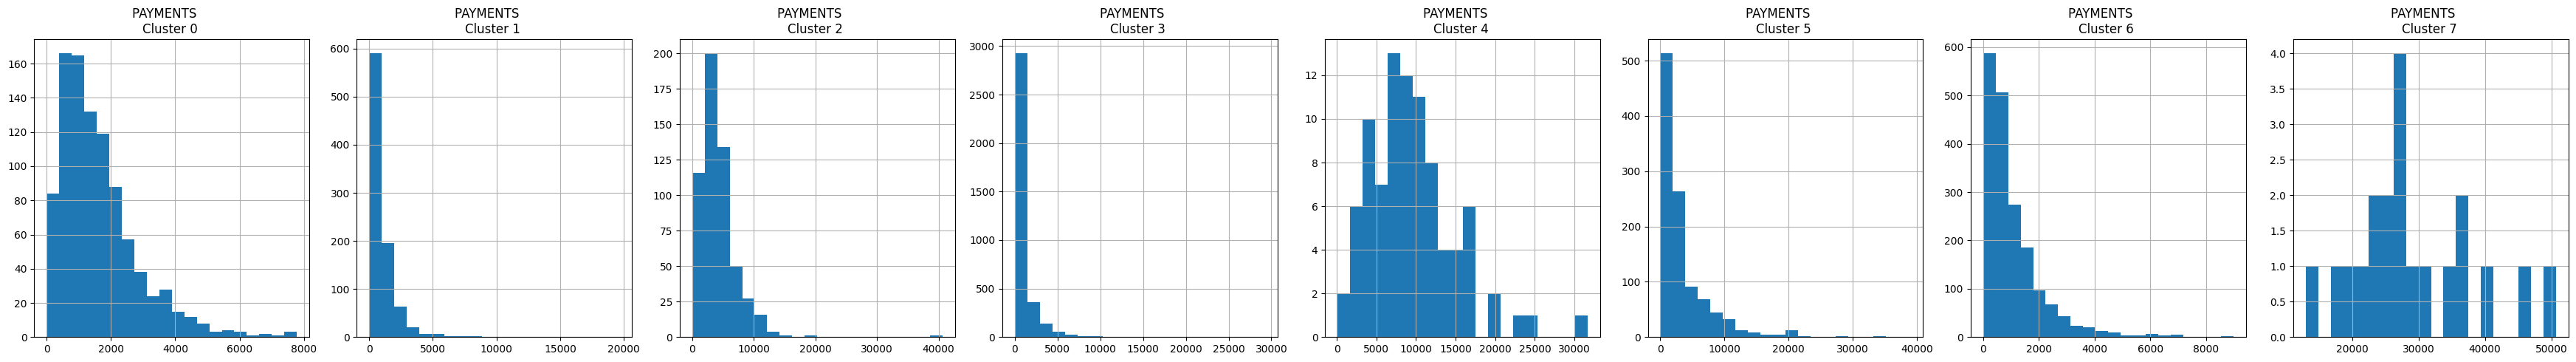

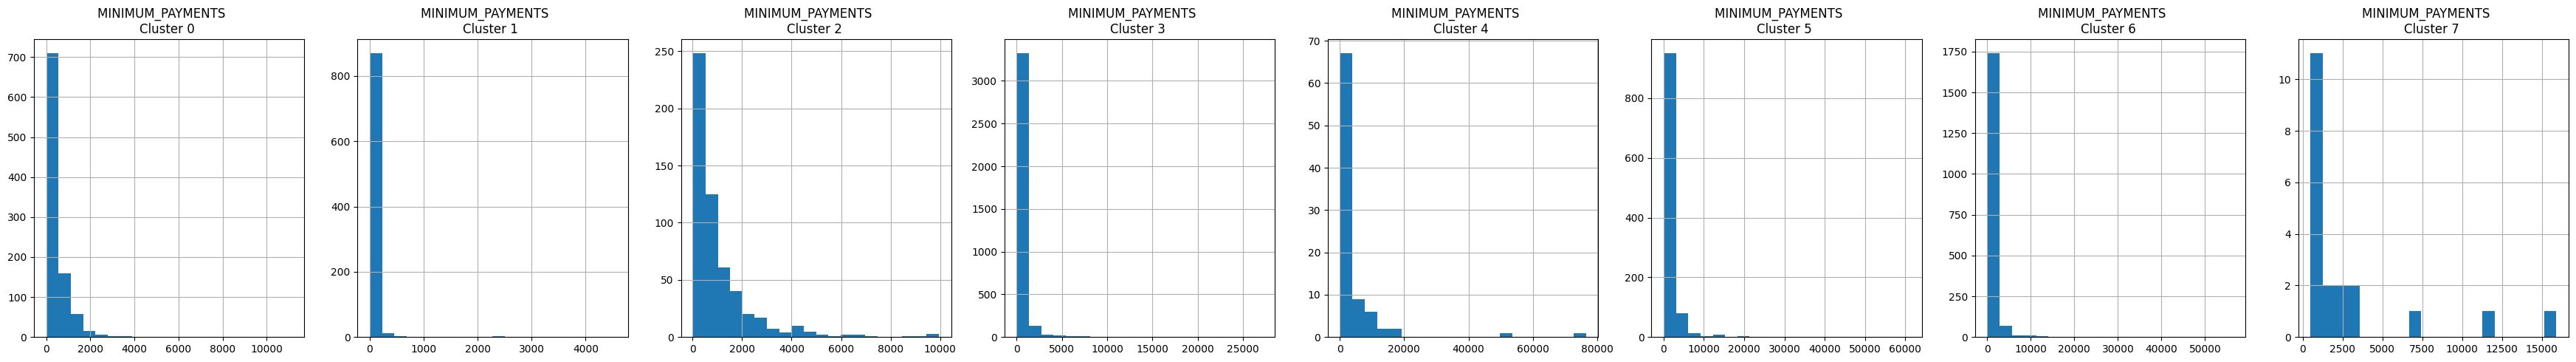

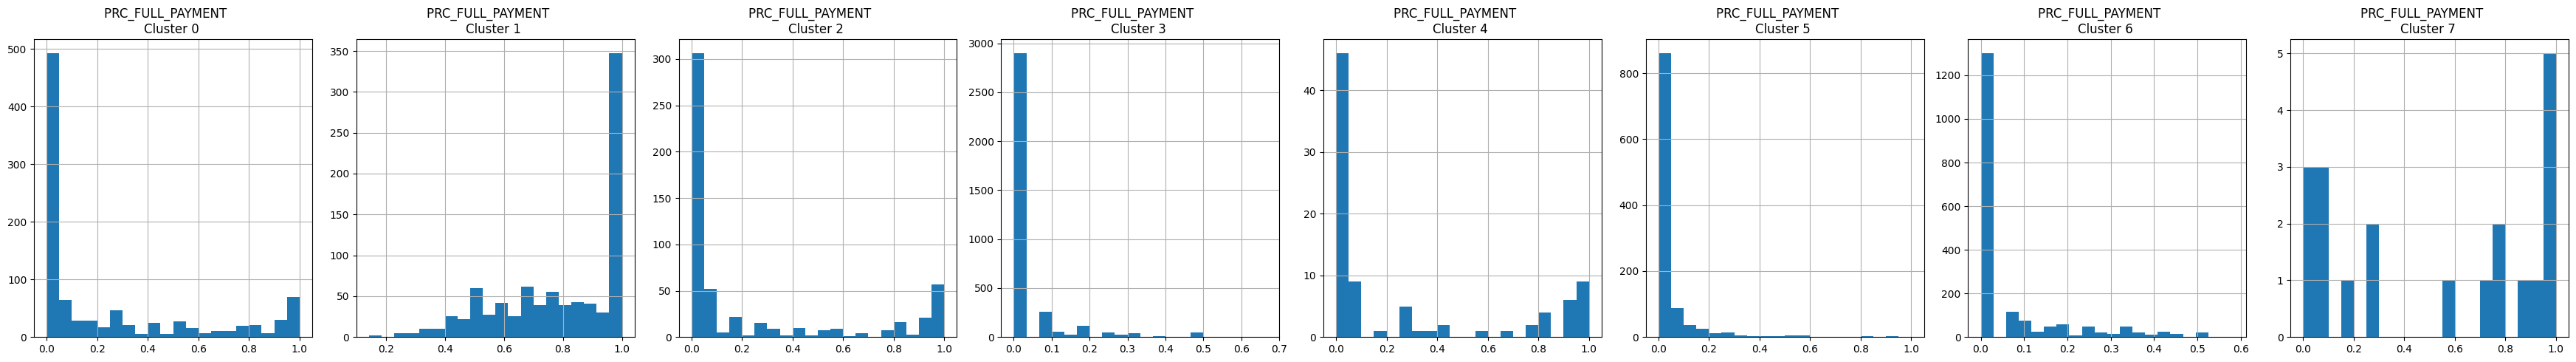

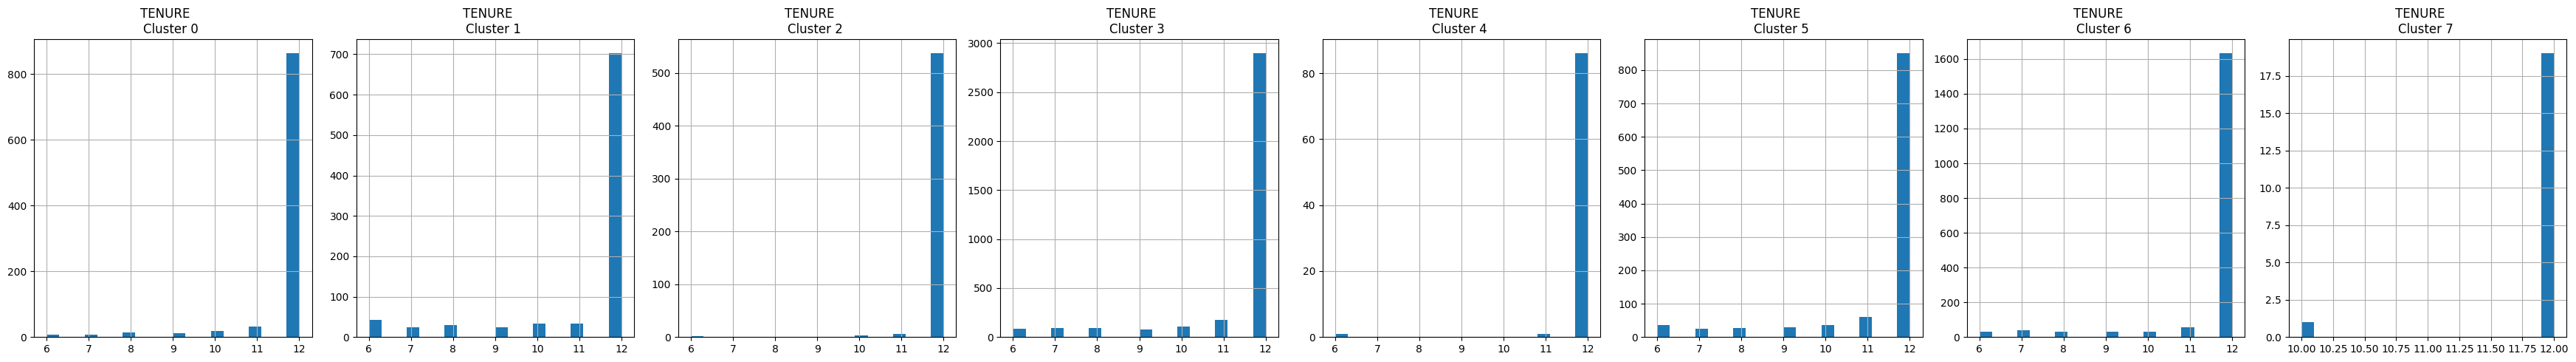

In [42]:
#Plot the histogram

for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['clusters'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
    plt.tight_layout()
  plt.show()

In [43]:
#To understand what these numbers mean,I will perform inverse transformation
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers


# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1125.770074,0.963815,1614.128363,1369.511668,244.668111,222.679388,0.822729,0.750592,0.289124,0.046434,0.838405,22.692550,5529.168177,1627.288655,466.101417,0.240447,11.749213
1,78.603643,0.767805,755.010112,149.993318,605.150179,56.986889,0.707411,0.071028,0.628362,0.008474,0.168161,12.807175,3867.439020,1039.506823,164.050538,0.792294,11.244395
2,2788.965033,0.986900,4509.897345,3045.168618,1464.728727,608.885641,0.957222,0.705087,0.819207,0.084785,1.938182,64.414545,8330.727273,4266.937727,1077.167512,0.238697,11.941818
3,1114.945661,0.808896,221.865279,180.486369,41.524868,683.996968,0.130006,0.073034,0.055477,0.131316,2.448881,2.235911,3249.800184,975.689097,619.674478,0.033239,11.437553
4,4521.494239,0.985537,9795.099318,4293.504318,5508.413182,1031.410875,0.955492,0.623967,0.905217,0.089962,3.488636,132.647727,10640.340909,9524.558853,4079.969486,0.276978,11.920455
5,4702.985409,0.967216,462.707387,293.595893,169.207049,4787.912062,0.265217,0.127892,0.167313,0.501036,15.069549,6.688910,7671.526828,3632.362399,1987.573805,0.035096,11.373120
6,1017.395403,0.925666,846.056350,205.502900,641.256258,291.768448,0.866064,0.097115,0.814388,0.056959,1.097732,18.373110,3255.383751,1058.124685,989.411384,0.064249,11.615011
7,5109.411343,0.949545,29095.715500,24021.496000,5074.219500,1115.627041,0.890833,0.840000,0.665000,0.045833,2.050000,123.150000,16075.000000,28948.783088,2870.119120,0.525947,11.900000


#7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [44]:
# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp


array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [45]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


In [46]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'clusters':labels})], axis = 1)
pca_df.head()

,pca1,pca2,clusters
0,-1.682220,-1.076451,3
1,-1.138295,2.506477,5
2,0.969684,-0.383520,0
3,-0.873628,0.043166,3
4,-1.599434,-0.688581,3


Text(0.5, 1.0, 'Clusters identified by PCA')

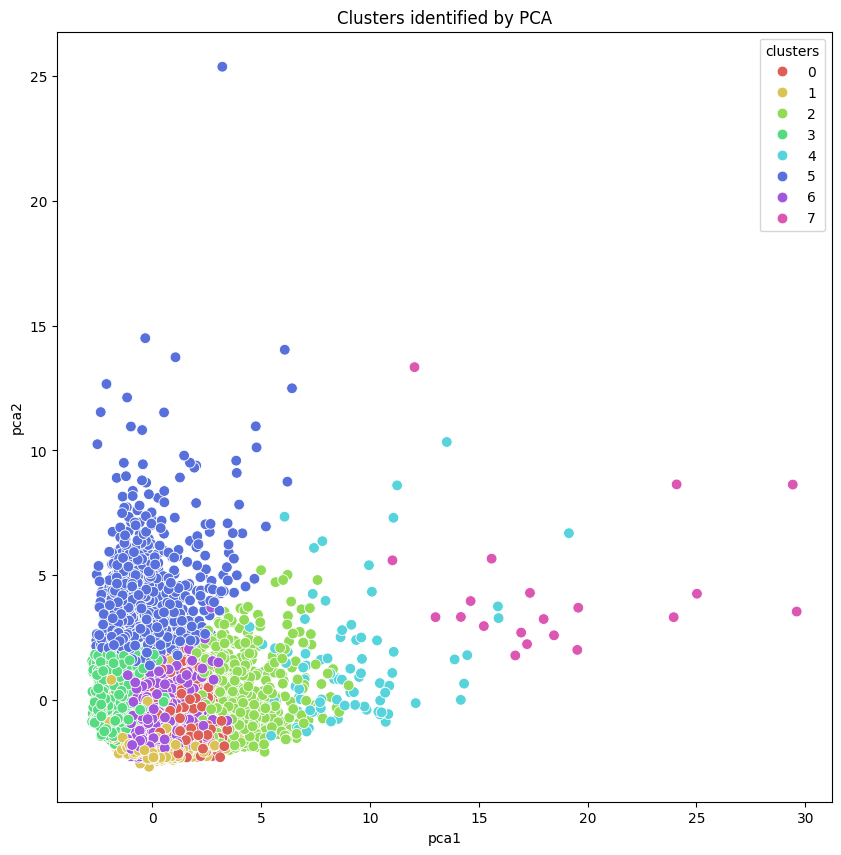

In [47]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'clusters', data = pca_df, s=60, palette=sns.color_palette('hls', 8))
plt.title('Clusters identified by PCA')

#9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [49]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling3D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [53]:
input_df = Input(shape = (17,))

x = Dense (7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

#Autoencoder
autoencoder = Model(input_df, decoded)

# Encoder

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
creditcard_df_scaled.shape

(8950, 17)

In [55]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 0.7309
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.3518
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.2519
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.2206
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.1738
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.1508
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.1404
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.1331
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.1232
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.1075
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.1062
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0990
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0972
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0899
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0829
Epoc

In [56]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 500)                 │           4,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2000)                │       1,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │          20,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2000)                │          22,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 500)                 │       1,000,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 17)                  │           8,517 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,922,961 (26.41 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,615,308 (17.61 MB)

In [57]:
pred = encoder.predict(creditcard_df_scaled)
pred

280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[0.15213148, 0.7311478 , 0.07055511, ..., 0.        , 0.04777076,
        0.        ],
       [0.        , 0.792451  , 0.48397985, ..., 0.        , 2.1857238 ,
        0.        ],
       [0.82616997, 0.49635687, 0.38454372, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.8877981 , 2.6221461 , 1.062986  , ..., 0.        , 0.        ,
        0.        ],
       [0.00768553, 2.8102233 , 1.0399944 , ..., 0.        , 0.06913949,
        0.        ],
       [0.73665005, 4.05749   , 0.9406067 , ..., 0.        , 0.339694  ,
        0.        ]], dtype=float32)

In [58]:
pred.shape

(8950, 10)

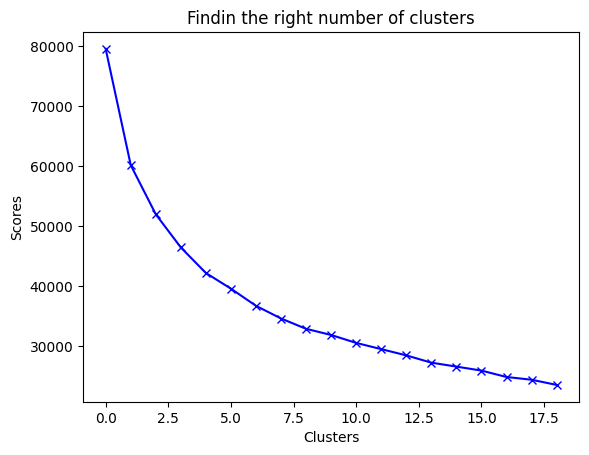

In [62]:

score_2 = []
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(pred)
  score_2.append(kmeans.inertia_)
plt.plot(score_2, 'bx-')
plt.title('Findin the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

<ipython-input-65-5dd6db3fb3e8>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(score_1, 'bx-', color = 'r')
<ipython-input-65-5dd6db3fb3e8>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(score_2, 'bx-', color = 'g')


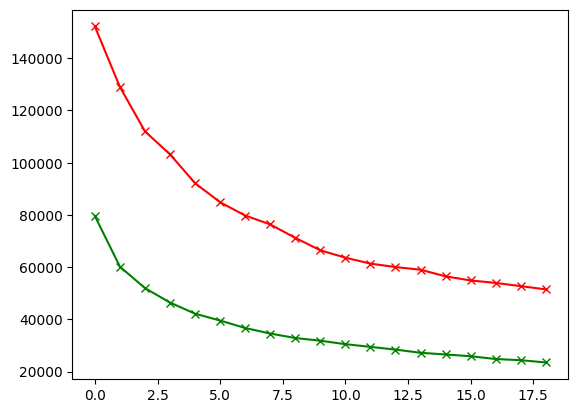

In [65]:
plt.plot(score_1, 'bx-', color = 'r')
plt.plot(score_2, 'bx-', color = 'g')

In [66]:
kmeans = KMeans(5)
kmeans.fit(pred)
labels = kmeans.labels_

In [67]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'clusters':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [69]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data =  prin_comp, columns = ['pca1', 'pca2'])

In [70]:
pca_df = pd.concat([pca_df, pd.DataFrame({'clusters':labels})], axis = 1)
pca_df.head()

,pca1,pca2,clusters
0,-1.697135,-0.374972,3
1,0.148586,1.940359,2
2,-0.231576,-0.294531,3
3,-0.121701,0.064321,0
4,-1.657411,-0.255740,3


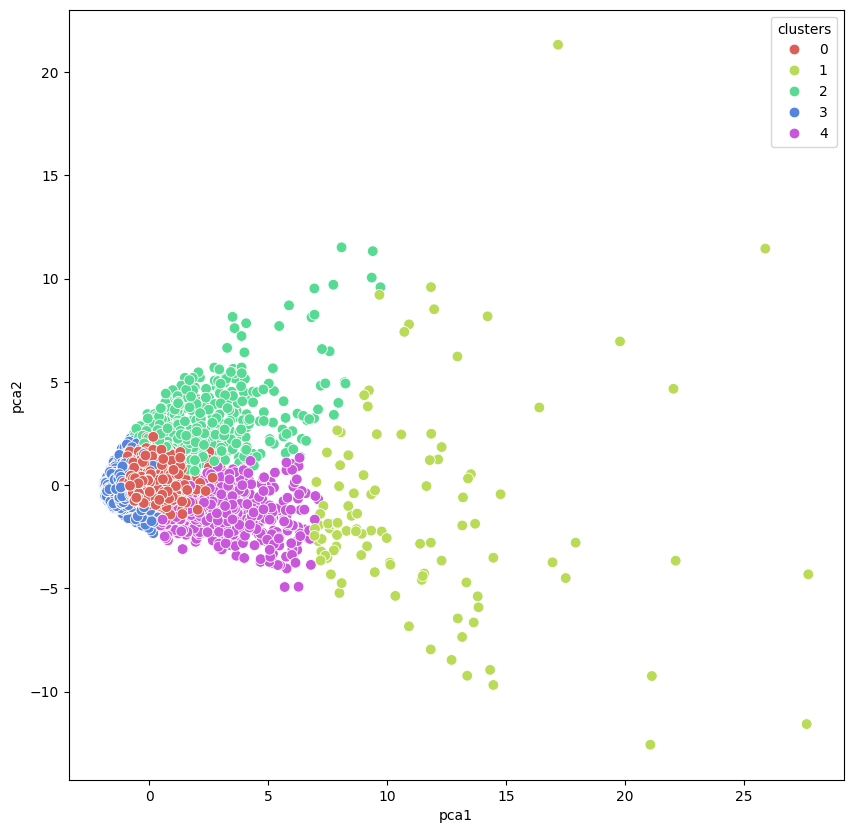

In [71]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'clusters', data = pca_df, s=60, palette=sns.color_palette('hls', 5))